In [9]:
%%bash
cd '../assets/datasets'
ls

hsq_codebook.txt
hsq_data.csv
mach_codebook.txt
mach_data.csv
scs_codebook.txt
scs_data.csv


In [14]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# make sure charts appear in the notebook:
%matplotlib inline

In [15]:
mach = pd.read_csv('../assets/datasets/mach_data.csv')

In [16]:
mach.head(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q15,Q16,Q17,Q18,Q19,Q20,score,gender,age,seconds_elapsed
0,4,4,2,2,4,2,3,5,3,4,...,4,4,2,0,5,2,68,1,24,177
1,2,2,4,4,4,2,2,2,4,4,...,3,2,2,4,5,2,60,2,33,107


## Properties of the list:
1. **Q1-Q20** : The twenty questions associated with the machiavilliain test
2. **score** : Score obtained out of 100
3. **gender** : gender of the participant
4. **age** : age of the participant
5. **seconds_elapsed** : time it took for participant to complete the test

In [17]:
mach.shape

(13156, 24)

## Shape of the list
There are *13156* individuals who took the test

In [18]:
mach.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q15,Q16,Q17,Q18,Q19,Q20,score,gender,age,seconds_elapsed
count,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000,...,13156.000000,13156.000000,13156.000000,13156.000000,13156.00000,13156.000000,13156.000000,13156.000000,13156.000000,13156.000000
mean,3.375646,3.278352,2.920949,2.655214,3.505853,2.611584,2.221876,3.067270,3.471116,2.970432,...,3.293554,2.683262,2.290742,3.486090,4.08498,2.542110,65.898525,1.354135,174.654074,608.977653
std,1.268259,1.297504,1.236152,1.231540,1.211830,1.315440,1.201208,1.292303,1.313440,1.279000,...,1.216768,1.297577,1.177610,1.166896,1.16169,1.351707,13.131049,0.494061,11709.751242,7815.456198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20.000000,0.000000,-9.000000,2.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,4.00000,1.000000,57.000000,1.000000,20.000000,147.000000
50%,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,2.000000,4.000000,4.00000,2.000000,66.000000,1.000000,26.000000,195.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,5.00000,4.000000,75.000000,2.000000,36.000000,287.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,100.000000,3.000000,999999.000000,702200.000000


## Suspicious Insights

1. Age is between -9 (not possible) and 999999
    * Need to isolate ages between ***14-65***
2. Seconds between 2s and 702200
    * Remove from < 30 and > 600

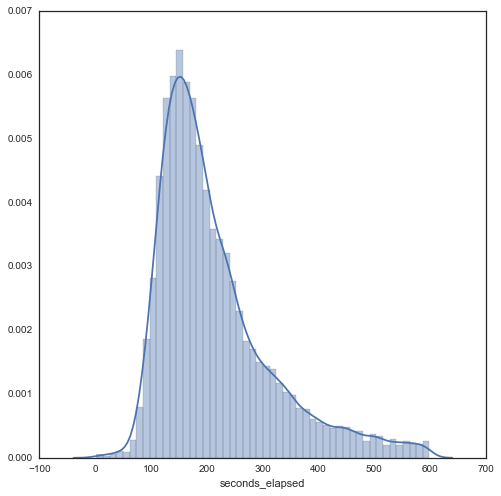

In [34]:
sns.set(rc={"figure.figsize": (8,8)},style='white')
tenmax = mach[mach.seconds_elapsed < 600] # Create 
agelimits = tenmax[(tenmax.age > 14) & (tenmax.age<65)]

sns.distplot(agelimits['seconds_elapsed'])

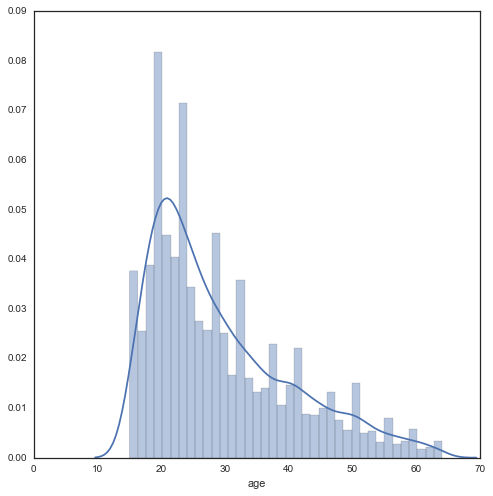

In [35]:
sns.distplot(agelimits['age'])

In [37]:
agelimits.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q15,Q16,Q17,Q18,Q19,Q20,score,gender,age,seconds_elapsed
count,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,...,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000,11772.000000
mean,3.363744,3.270133,2.916072,2.661995,3.496092,2.597520,2.202514,3.049864,3.480377,2.967210,...,3.281006,2.676351,2.243969,3.479613,4.101682,2.513337,65.840639,1.349049,29.240061,214.351937
std,1.255569,1.281836,1.213546,1.216238,1.198958,1.297582,1.174055,1.280203,1.295663,1.260731,...,1.201139,1.282099,1.143933,1.148631,1.137004,1.327864,12.762680,0.491778,11.047367,102.514651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,15.000000,2.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,1.000000,3.000000,4.000000,1.000000,57.000000,1.000000,21.000000,143.000000
50%,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,2.000000,4.000000,4.000000,2.000000,66.000000,1.000000,26.000000,186.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,75.000000,2.000000,36.000000,256.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,3.000000,64.000000,599.000000


# Convert from "wide to long"

In [60]:
subject_ids = np.arange(1, mach.shape[0]+1)
print subject_ids.shape, mach.shape

(13156,) (13156, 25)


In [61]:
mach['subject_ids'] = subject_ids

In [62]:
qlist =[]
for x in range(20):
    q = "Q" + str(x+1)
    qlist.append(q)
    
qlist

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20']

In [63]:
mach_long = pd.melt(mach,
                   id_vars =['subject_ids','age','gender'],
                   value_vars=qlist,
                   value_name='value')

In [70]:
mach_long.head(3)
mach_long.tail(3)

,subject_ids,age,gender,variable,value
263117,13154,20,male,Q20,4
263118,13155,27,male,Q20,1
263119,13156,47,female,Q20,2


In [65]:
def gender_conv(gen):
    if gen == 1:
        return 'male'
    elif gen == 2:
        return 'female'
    elif gen == 3:
        return 'other'

In [66]:
mach_long.gender = mach_long.gender.map(gender_conv)

In [67]:
mach_long.head()
mach_long.shape

(263120, 5)

In [68]:
unresponded = mach_long[mach_long.value != 0]
unresponded.head()

,subject_ids,age,gender,variable,value
0,1,24,male,Q1,4
1,2,33,female,Q1,2
2,3,21,female,Q1,4
3,4,21,male,Q1,3
4,5,17,male,Q1,4


In [69]:
unresponded.shape

(262078, 5)